In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [5]:
df['Age'].median()

np.float64(28.0)

In [7]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_19708\2855201930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [11]:
df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208
std,0.486592,0.836071,13.019697,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

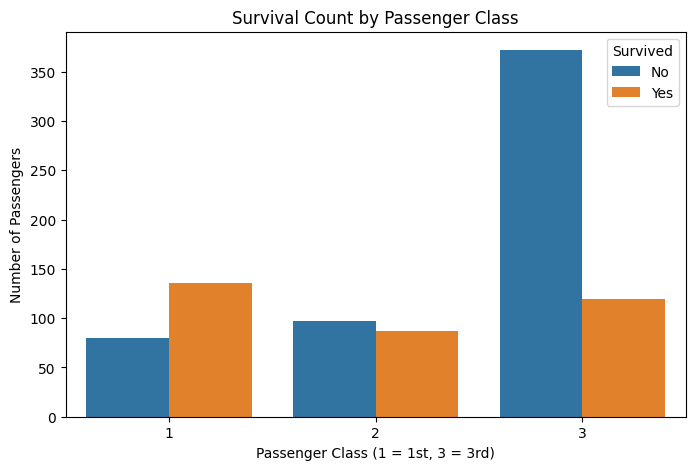

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class (1 = 1st, 3 = 3rd)")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,28,7.2500
1,1,1,0,51,71.2833
2,1,3,0,34,7.9250
3,1,1,0,47,53.1000
4,0,3,1,47,8.0500
...,...,...,...,...,...
886,0,2,1,35,13.0000
887,1,1,0,24,30.0000
888,0,3,0,36,23.4500
889,1,1,1,34,30.0000


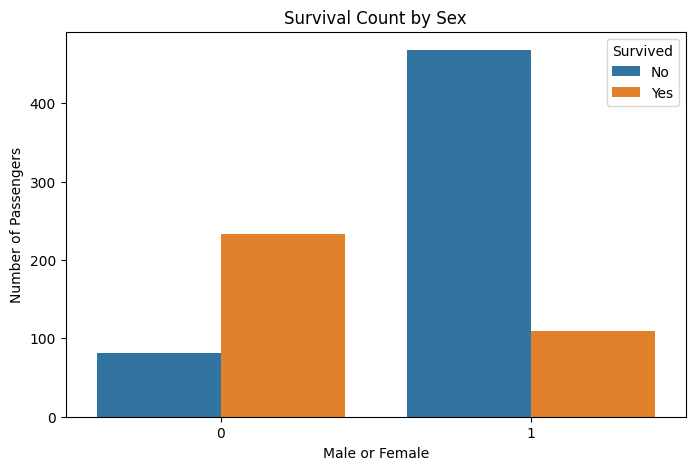

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Sex")
plt.xlabel("Male or Female")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

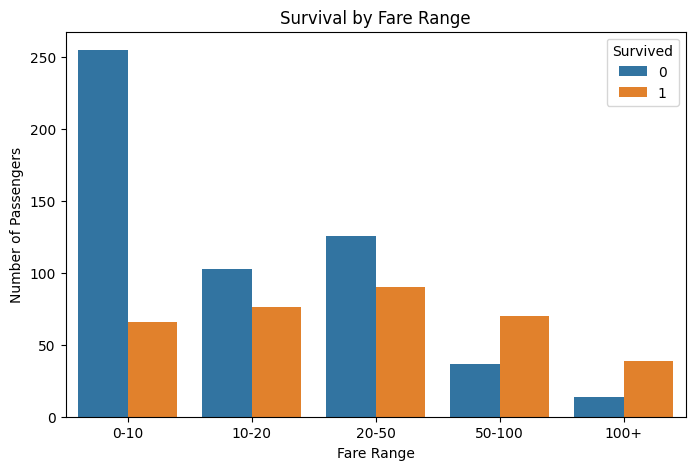

In [19]:
# Create Fare bins
df['Fare_bin'] = pd.cut(df['Fare'], bins=[0, 10, 20, 50, 100, 600], labels=['0-10','10-20','20-50','50-100','100+'])

plt.figure(figsize=(8,5))
sns.countplot(x='Fare_bin', hue='Survived', data=df)
plt.title("Survival by Fare Range")
plt.xlabel("Fare Range")
plt.ylabel("Number of Passengers")
plt.show()


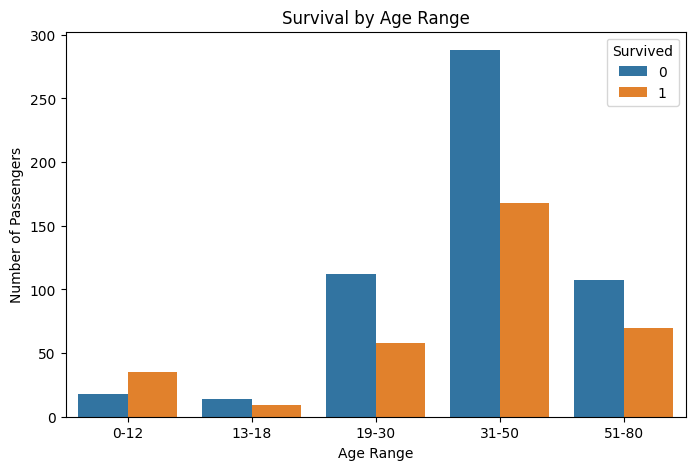

In [20]:
# Create Age bins
df['Age_bin'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['0-12','13-18','19-30','31-50','51-80'])

plt.figure(figsize=(8,5))
sns.countplot(x='Age_bin', hue='Survived', data=df)
plt.title("Survival by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Number of Passengers")
plt.show()

In [21]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Fare_bin,Age_bin
0,0,3,1,28,7.2500,0-10,19-30
1,1,1,0,51,71.2833,50-100,51-80
2,1,3,0,34,7.9250,0-10,31-50
3,1,1,0,47,53.1000,50-100,31-50
4,0,3,1,47,8.0500,0-10,31-50
5,0,3,1,36,8.4583,0-10,31-50
6,0,1,1,69,51.8625,50-100,51-80
7,0,3,1,6,21.0750,20-50,0-12
8,1,3,0,35,11.1333,10-20,31-50
9,1,2,0,18,30.0708,20-50,13-18


In [25]:
inputs = df.drop(['Fare_bin','Age_bin','Survived'],axis='columns')

In [ ]:
inputs

,Pclass,Sex,Age,Fare
0,3,1,28,7.2500
1,1,0,51,71.2833
2,3,0,34,7.9250
3,1,0,47,53.1000
4,3,1,47,8.0500
...,...,...,...,...
886,2,1,35,13.0000
887,1,0,24,30.0000
888,3,0,36,23.4500
889,1,1,34,30.0000


In [27]:
target = df[['Survived']]

In [28]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
model = DecisionTreeClassifier()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.20, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)

(712, 4)
(179, 4)


In [34]:
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
model.score(X_test,y_test)

0.7486033519553073

In [37]:
model.score(X_train,y_train)

0.9775280898876404

In [38]:
import joblib

In [40]:
joblib.dump(model,'titanic_survived' )

['titanic_survived']